In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load


import scipy.io as sio
from sklearn.cluster import KMeans
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , DBSCAN, k_means
import warnings
warnings.filterwarnings('ignore')


<a id="1"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> BUSINESS UNDERSTANDING</p>

Hunter's e-grocery is a well-known new generation lifestyle brand. That has a brand presence in ten countries and is continually seeking for new methods to better and anticipate the demands of their customers. Black swan events such as Covid-19, the Ukraine crisis, and the gas scarcity have all had an influence on the purchasing behaviour of clients. Therefore, using an unsupervised machine learning model and Principal component analysis (PCA) for dimensionality reduction, We will develop a business values proposition for predictive marketing in order to target our customers based on features of their purchasing behavior.

<a id="2"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA UNDERSTANDING</p>

#### **The dataset consists of 2019501 Rows & 12 Columns which are as follows :**

- order_id – (A unique number to identity the order)
- user_id - (A unique number to identify the user)
- order_number – (Number of the order)
- order_dow – (Day of the Week the order was made)
- order_hour_of_day – (Time of the order)
- days_since_prior_order - (History of the order)
- product_id – (Id of the product)
- add_to_cart_order – (Number of items added to cart)
- reordered – (If the reorder took place)
- department_id - (Unique number allocated to each department)
- department – (Names of the departments)
- product_name – (Name of the products)


#### **We will be doing the below steps to further understand the data:**

- Importing packages
- Loading data
- Get information on the data
- Conducting summary statistics 
- Taking care of Null values
- Converting data types

In [2]:
# LOADING DATA
main_data = pd.read_csv("ECommerce_consumer behaviour.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

### Note:

**From the above summary statistics we could see that we have null value in “ days_since_prior_order” which is 6.8 % of the entire data set. The following are the steps we will do to further continue on the explanatory analysis in sequential order.**

In [5]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [6]:
# TAKING CARE OF NULL VALUES
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True) 

In [7]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [8]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


<a id="3"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

#### **In this section we will be doing the following steps:**

- Investigating all elements within each feature
- Aggregating & grouping values to visualize purchasing behaviour
- Aggregating & grouping values to understand purchasing behaviour
- Aggregating & grouping values to visualize & identify the most reordered items
- Aggregating & grouping values to understand product reordered ratio
- Aggregating & grouping values to visualize reordered ratio


In [10]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [11]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

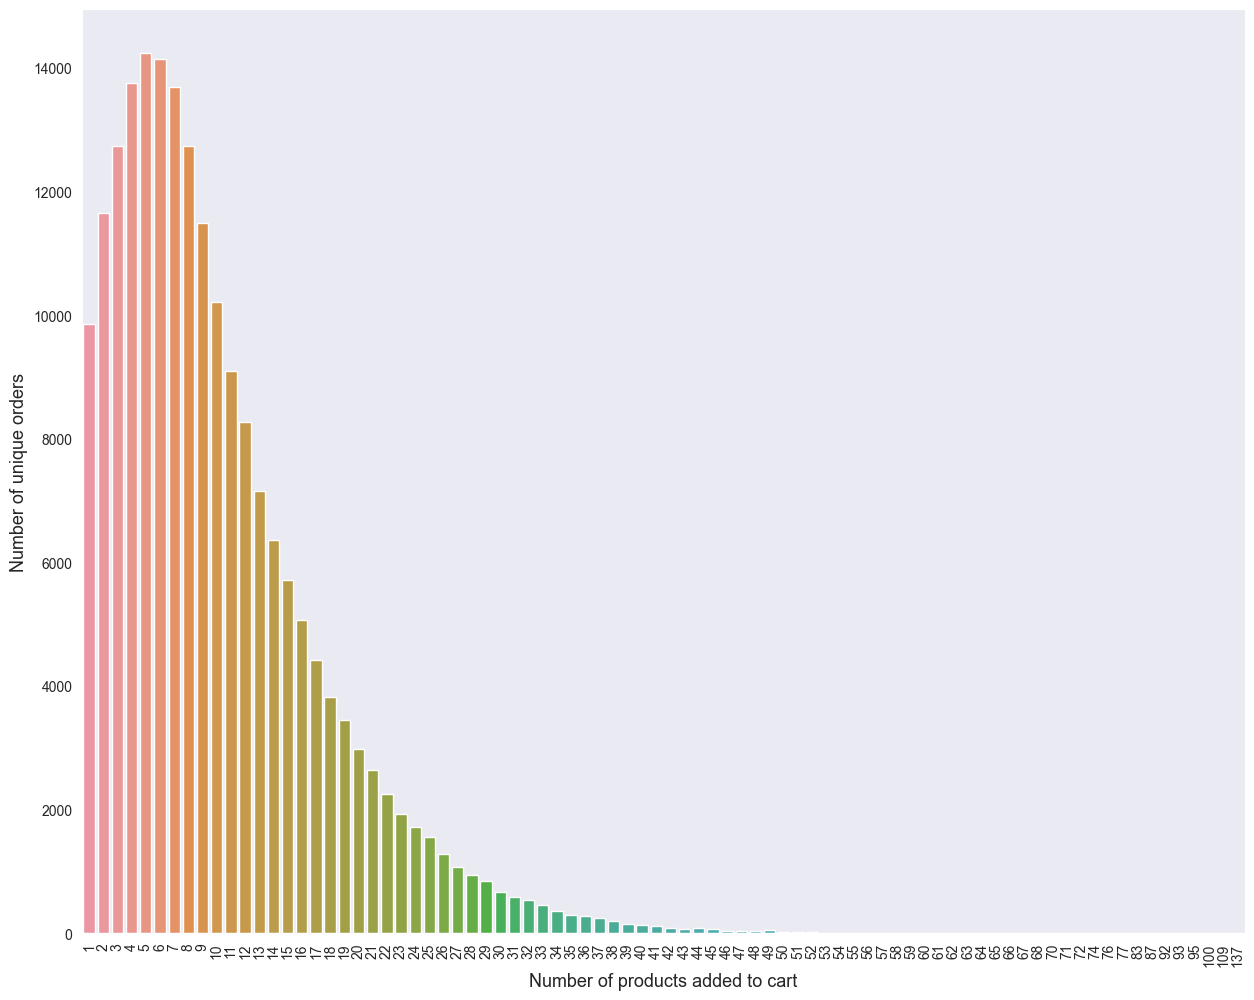

In [16]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

### Note:
**From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.**

In [21]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


### Note:
**From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the 
customers are most interested to purchase**

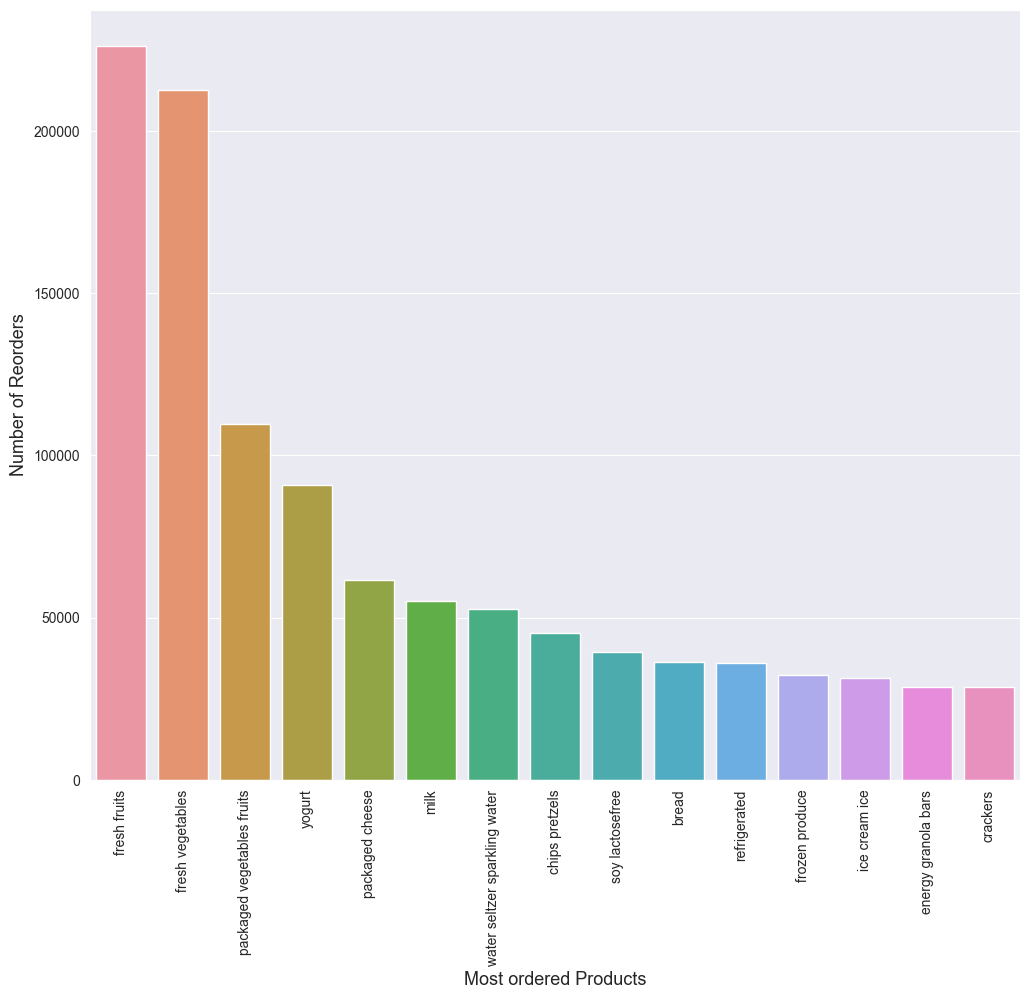

In [22]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

### Note:
**From the above analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "Packaged Cheese" are top 5 most reordered products.**

In [25]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


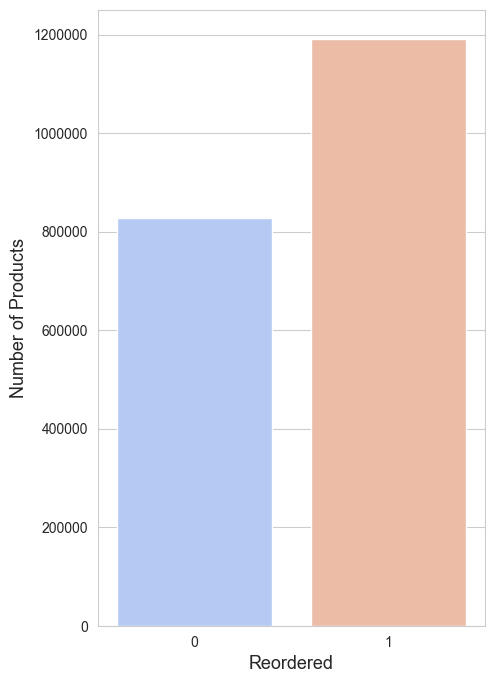

In [26]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE REORDERED RATIO
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Note:
**From the above we can see that 59 % of products were reordered by customers.**

<a id="4"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING : K-MEANS</p>

#### **In this section we will be first building a K-Means clustering followed by PCA:**

#### K-Means Clustering:

K-means clustering is an unsupervised learning algorithm that divides a dataset into k clusters, where k is the number of clusters specified by the researcher. The goal of the algorithm is to minimize the sum of squared distances between the points in a cluster and the centroid of the cluster.

Here is an example of how K-means clustering might work:

Suppose we have a dataset with two features (x and y) and we want to use K-means to divide the data into two clusters. We start by randomly initializing two points (centroids) in the data. We then assign each data point to the cluster corresponding to the nearest centroid. Once all of the points have been assigned to a cluster, we compute the new centroids for each cluster by taking the mean of all of the points in the cluster. We then re-assign each data point to the cluster corresponding to the nearest centroid. This process is repeated until the centroids stop moving or the assignment of points to clusters stops changing. 

**Therefore, the following are the methodological steps we will be taking to build our model:** 

- First step we will be training & experimenting K-means with 6 clusters (testing version)
- Second step we will try to run the K-means on a rang of 2 -10 clusters (to find optimal number of cluster)
- Creat Scree plot to visualize the inertia using Elbow method (for visualization)
- Re-running K-means with 5 cluster


In [27]:
len(df.product_id.unique())

134

In [28]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [29]:
# RUNNING K-MEANS
X_train = clst_prd.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 5 4 ... 0 5 4]
The Inertia is : 4996208.424404018


In [30]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543563.039323029
The inertia for : 3 Cluster is :  6284974.785130065
The inertia for : 4 Cluster is :  5731891.172768631
The inertia for : 5 Cluster is :  5281365.500382091
The inertia for : 6 Cluster is :  4996208.424404018
The inertia for : 7 Cluster is :  4763193.064231278
The inertia for : 8 Cluster is :  4586277.708068164
The inertia for : 9 Cluster is :  4435260.174072224


Text(0.5, 1.0, 'Inertia Plot per k')

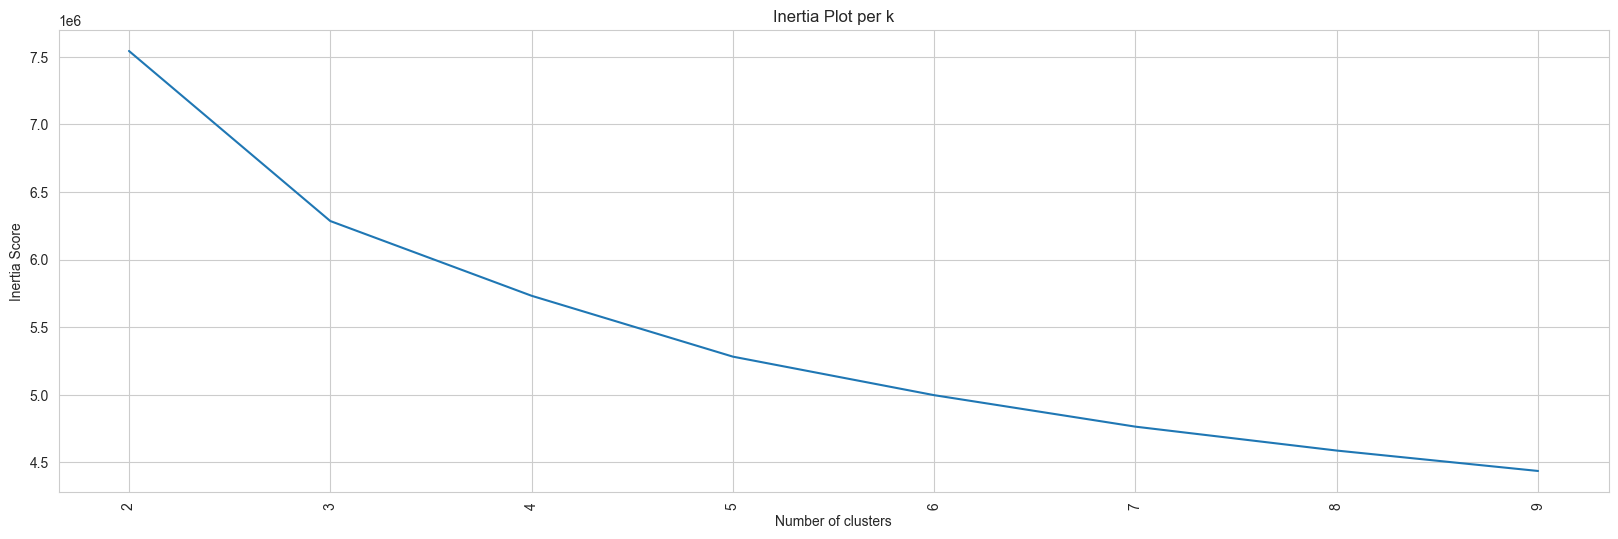

In [32]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

### Note:
**From the above plot we can come to an understanding that the inertia score start to drop drastically between 4 - 5 number of cluster. Thefore, I have decided to choose 5 number of cluster to grain granularity on our study**

In [33]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,6184,1927,8043,26321,62798


In [34]:
kmeans.labels_

array([4, 3, 4, ..., 4, 3, 4])

In [35]:
predictions

array([4, 3, 4, ..., 4, 3, 4])

In [39]:
from itertools import product

eps_values = np.arange(8,10.50,0.25) # eps values to be investigated
min_samples = np.arange(3,8) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [40]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_train)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_train, DBS_clustering.labels_))

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)

DBSCAN_clustered = X_train.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

<a id="5"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING :PRINCIPAL COMPONENT ANALYSIS (PCA)</p>

#### PCA:

Principal component analysis (PCA) is a statistical technique that is used to analyze the patterns in data. It involves finding a set of directions, or "principal components," that capture as much of the variation in the data as possible. These principal components can be visualized as lines or planes in the data, and are typically chosen so that they are mutually orthogonal (i.e., perpendicular to one another).

One way to visualize PCA is to plot the data in a scatterplot, with the principal components as the axes. This can help to reveal patterns in the data that are not immediately apparent when looking at the raw data. For example, if the data points form a clear cluster in the scatterplot, this may indicate that there is some underlying structure to the data that can be captured by the principal components.

Another way to visualize PCA is to plot the data in a lower-dimensional space, such as a 2D or 3D plot. This can be particularly useful when dealing with high-dimensional data, as it can be difficult to visualize patterns in data with more than 3 dimensions. In this case, the principal components can be used to "project" the data onto a lower-dimensional space, allowing the patterns in the data to be more easily visualized. 

**Therefore, the following are the methodological steps we will be taking to plot PCA in 2D:** 

- Running Principal Component Analysis (PCA) to visualize & improve results for 5 clusters
- Identifying the "best" number of components
- Running PCA again with 9 components
- Finally re-running K-means with 5 clusters & PCA with 9 components


Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 432x288 with 0 Axes>

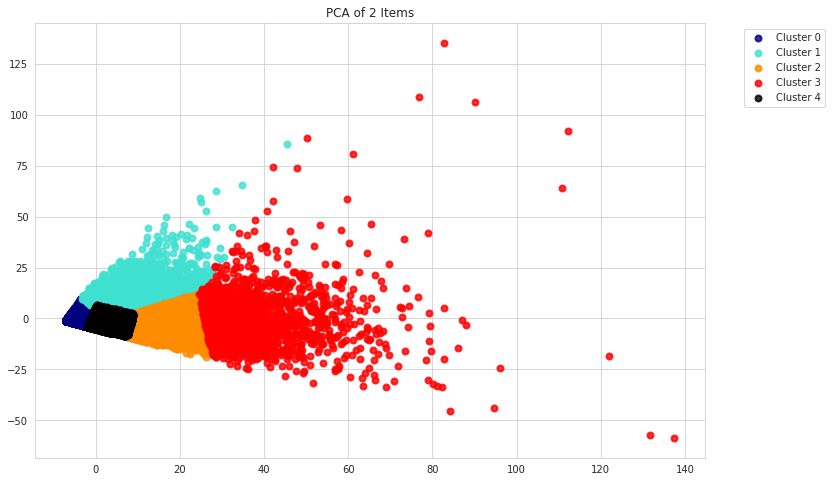

In [26]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  113.18063996195708
The 95% variance we want to have is:  107.52160796385922

Variance explain with 4 n_compononets:  95.01640082451154
Variance explain with 8 n_compononets:  105.33440036554845
Variance explain with 9 n_compononets:  106.69075586909086
Variance explain with 10 n_compononets:  107.98339847734054
Variance explain with 15 n_compononets:  112.05606051805344
Variance explain with 18 n_compononets:  113.05270297347113
Variance explain with 21 n_compononets:  113.18063996195708


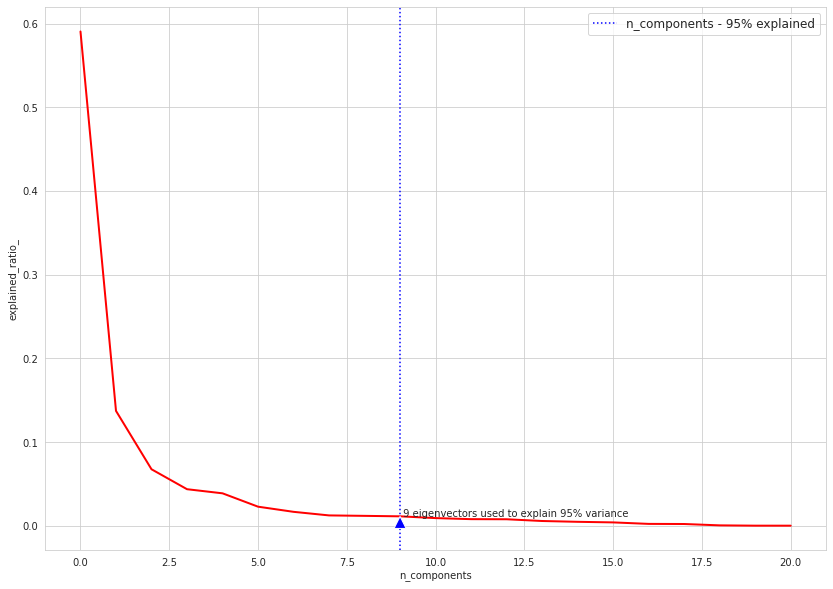

In [27]:
# IDENTIFYING THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# PLOTTING LINE WITH 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]), 
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

### Note:
**From the above plot we can see that 9 eigenvectors can be used to represent 95% variance**

The innertia for : 2 Clusters is: 6860370.3734932
The innertia for : 3 Clusters is: 5601874.036457417
The innertia for : 4 Clusters is: 5048851.917917995
The innertia for : 5 Clusters is: 4598343.436213488
The innertia for : 6 Clusters is: 4313269.845758161
The innertia for : 7 Clusters is: 4080311.6976732337
The innertia for : 8 Clusters is: 3903531.8243352463
The innertia for : 9 Clusters is: 3752599.3219573447


Text(0.5, 1.0, 'Inertia Plot per k')

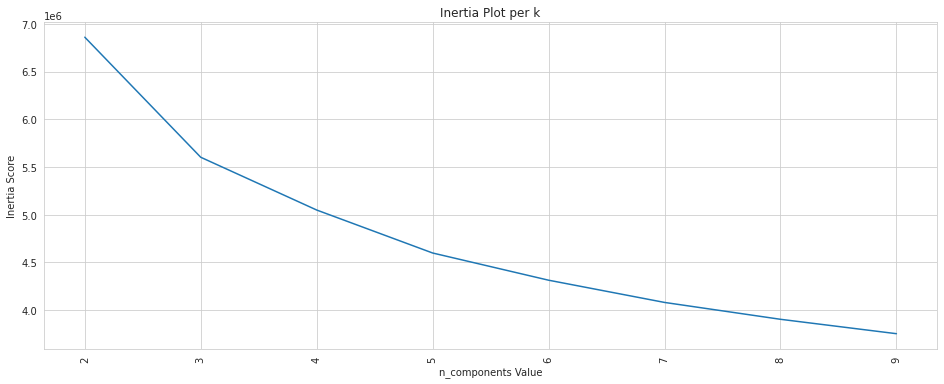

In [28]:
# RUNNING PCA AGAIN WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

# RUNNING K-MEANS
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [29]:
## FINAL STEP:

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit(X).transform(X)

# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
clst_prd['clusters'] = clusters

# CREATING A CLUSTER CATERGORY
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,0,Cluster 1
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,3,Cluster 4
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,0,Cluster 1
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,0,Cluster 1


<a id="6"></a>
<p style="background-color:#080808;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> CONCLUSION</p>


#### **BUSINESS VALUE:**


In this Research Kernel, I utilized unsupervised machine learning along with PCA to decrease the number of dimensions to 9 components and 5 clusters. These clusters could then be used to target marketing campaigns based on the company's requirements and consumer characteristics. I have also build a live dashboard below for the purpose of end-end deployment.



